In [3]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_ollama import ChatOllama
from IPython.display import Markdown, display, Image

In [4]:
llm = ChatOllama(model="llama3.2:latest", base_url="http://localhost:11434")
llm.invoke('Hi').content

'Hello! How can I assist you today?'

In [6]:
class State(TypedDict):
    messages: Annotated[list[str], add_messages]


def chat_bot(state: State) -> str:
    response= llm.invoke(state["messages"])
    return {"messages": [response]   }

graph_builder = StateGraph(State)

graph_builder.add_node("chat_bot", chat_bot)

graph_builder.add_edge(START, "chat_bot")

graph_builder.add_edge("chat_bot", END)

graph = graph_builder.compile()

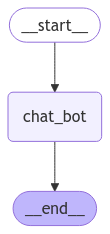

In [7]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({"messages": ["Hi", "Tell me 3 fruits"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='9504864e-d14e-4b89-8b51-379f0cfb6daa'),
  HumanMessage(content='Tell me 3 fruits', additional_kwargs={}, response_metadata={}, id='5289e185-f2eb-4448-b977-bf22843b1ade'),
  AIMessage(content='Here are three fruits:\n\n1. Apple\n2. Banana\n3. Mango', additional_kwargs={}, response_metadata={'model': 'llama3.2:latest', 'created_at': '2025-02-18T06:27:15.241592Z', 'done': True, 'done_reason': 'stop', 'total_duration': 382087500, 'load_duration': 29772583, 'prompt_eval_count': 32, 'prompt_eval_duration': 134000000, 'eval_count': 17, 'eval_duration': 217000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-9805c02d-9c14-475d-a66d-2cfaa61e22eb-0', usage_metadata={'input_tokens': 32, 'output_tokens': 17, 'total_tokens': 49})]}

In [11]:
while True:
    user_input = input("You: ")
    if user_input == "exit":
        break
    result = graph.invoke({"messages": [user_input]})
    display(Markdown(result["messages"][-1].content))

Here are 7 of the most famous Wonders of the World:

1. **The Great Pyramid of Giza**: Located in modern-day Egypt, this is the oldest and only remaining ancient wonder still standing.
2. **The Hanging Gardens of Babylon**: Located in present-day Iraq, these gardens were said to be a marvel of engineering and beauty, but their exact location and existence are still debated among historians.
3. **The Statue of Zeus at Olympia**: This massive statue of the Greek god Zeus was built by Phidias and located in ancient Greece. It was considered one of the greatest artistic achievements of the ancient world.
4. **The Temple of Artemis at Ephesus**: Located in present-day Turkey, this massive temple was dedicated to the Greek goddess Artemis and was known for its impressive size and beauty.
5. **The Mausoleum at Halicarnassus**: Also located in present-day Turkey, this grand tomb was built for King Mausolus and was famous for its stunning architecture and sculptures.
6. **The Colossus of Rhodes**: This massive bronze statue of the Greek god Helios was built in ancient Greece and became a symbol of the city of Rhodes.
7. **The Lighthouse of Alexandria**: Located on the island of Pharos in Egypt, this towering lighthouse was one of the tallest structures in the ancient world and played a crucial role in navigation.

Note: There are actually two lists of Seven Wonders of the World - the original list from ancient times and a new list compiled in 2007.

Here are the 7 New Wonders of the World, as chosen by a worldwide poll in 2007:

1. **The Great Wall of China**: A series of fortifications built across several Chinese dynasties to protect the country from invasions.
2. **The Taj Mahal**: A white marble mausoleum in India built by the Mughal emperor Shah Jahan as a tribute to his wife Mumtaz Mahal.
3. **Machu Picchu**: An Inca citadel in Peru built in the 15th century and abandoned before the arrival of the Spanish conquistadors.
4. **Chichén Itzá**: A pre-Columbian Mayan city on the Yucatán Peninsula in Mexico, built by the Maya civilization around 600 AD.
5. **The Roman Colosseum**: An amphitheater in the center of Rome, Italy, built in the 1st century AD and used for gladiatorial contests and other public events.
6. **The Christ the Redeemer statue**: A massive Art Deco statue of Jesus Christ in Rio de Janeiro, Brazil, built between 1922 and 1931.
7. **The Pyramids of Giza**: The oldest and only remaining ancient wonder, a complex of three pyramids on the outskirts of modern-day Cairo, Egypt.

In addition to these 7 New Wonders, there are also 21 New Wonders of Nature, as chosen by the same poll in 2007:

1. **The Amazon Rainforest**
2. **The Great Barrier Reef**
3. **Iguazu Falls**
4. **Ha Long Bay**
5. **Mount Everest**
6. **Parícutin volcano**
7. **Table Mountain**
8. **The Grand Canyon**
9. **The Great Rift Valley**
10. **Mount Kilimanjaro**
11. **The Victoria Falls**
12. **The Aurora borealis (Northern Lights)**
13. **The Monument Valley**
14. **The Parícutin volcano**
15. **The Trolltunga rock formation**
16. **The Zhangjiajie National Forest Park**
17. **The Galapagos Islands**
18. **The Plitvice Lakes National Park**
19. **The Great Blue Hole**
20. **The Mount Etna**
21. **The Tsingy de Bemaraha National Park**

And, in 2011, the New7Wonders Foundation chose 7 Wonders of the World to be "inscribed" into the list of new wonders:

1. **The Great Wall of China**
2. **The Taj Mahal**
3. **Machu Picchu**
4. **Chichén Itzá**
5. **The Roman Colosseum**
6. **Christ the Redeemer statue**
7. **The Pyramids of Giza**

These 21 New Wonders are considered to be the most amazing and awe-inspiring natural and man-made structures in the world.

It seems like you forgot to ask a question. Please go ahead and ask me anything, and I'll do my best to help!

It seems like you didn't ask a question. What's on your mind? Would you like to know something or ask for help with a problem? I'm here to assist you!

It looks like you didn't provide a question or topic for me to assist with. Can you please provide some context or ask a question? I'll do my best to help!

I'm happy to chat with you. Is there something on your mind that you'd like to talk about, or are you looking for recommendations on a particular topic? I can provide information and assistance on a wide range of subjects, including but not limited to:

* Science and technology
* Health and wellness
* Personal finance and career development
* Travel and culture
* Food and recipes
* And more!

Let me know how I can help you today!

It seems like you didn't provide a question or topic for me to assist with. If you have any questions, need help with a task, or just want to chat, feel free to ask and I'll do my best to assist you! What's on your mind?